In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
theta=np.loadtxt("esp_cara_cobre_LIF.txt", usecols=0)
I=np.loadtxt("esp_cara_cobre_LIF.txt", usecols=1)
I=I[theta>5.8]
I=I/sum(I)
theta=theta[theta>5.8]



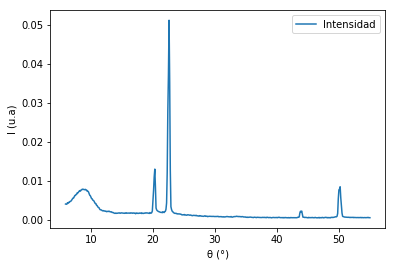

In [3]:
plt.figure(figsize=(6,4))
plt.plot(theta, I, label='Intensidad')
plt.xlabel('\u03b8 (°)')
plt.ylabel('I (u.a)')
plt.legend()
plt.savefig('inteanguloLiF.png')

In [4]:
d=2.04E-10

In [5]:
landa=2*d*np.sin(theta*np.pi/180)
landa=landa*(10**10)

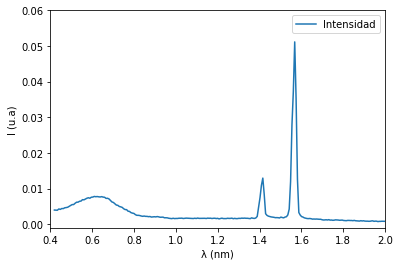

In [6]:
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([0.4,2.0,-0.001,0.06])
plt.legend()
plt.savefig('intelongLiF.png')

In [27]:
Ialp=max(I)
Ibet=max(I[landa<1.5])
Kalp=landa[I==Ialp][0]
Kbet=landa[I==Ibet][0]
Ibet

0.008462946020128087

In [8]:
Kalp, Kbet

(1.567924916451999, 1.415497458418884)

0.007499999999999951

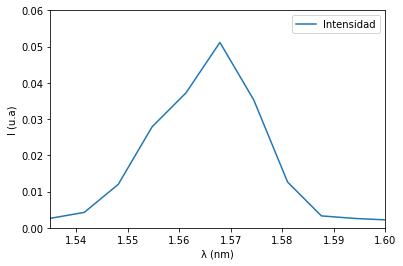

In [9]:
#Incertidumbres Kalph
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.535,1.6,0,0.06])
plt.legend()
sigmaAlp=abs(1.560-1.575)/2
sigmaAlp
#Incertidumbre Kalph=0.007 nm

0.007499999999999951

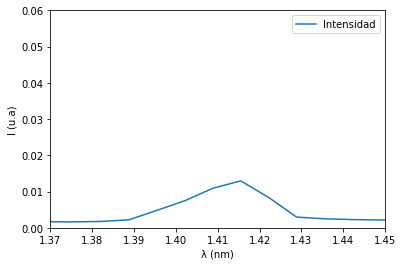

In [10]:
#Incertidumbres Kbet
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.37,1.45,0,0.06])
plt.legend()
sigmaBet=abs(1.405-1.420)/2
sigmaBet
#Incertidumbre Kbet=0.007 nm

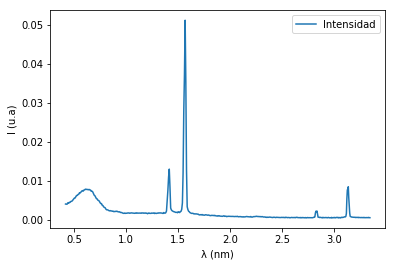

In [11]:
#Analisis de segundo orden
landaV=landa
IV=I
plt.figure(figsize=(6,4))
plt.plot(landaV, IV, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.legend()

In [12]:
landa=landaV[landaV>2.5]*0.5
I=IV[landaV>2.5]

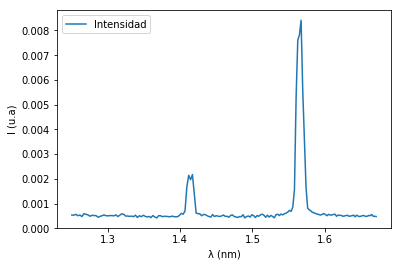

In [13]:
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.legend()
plt.savefig('intelongLiFsegundo.png')

1.414

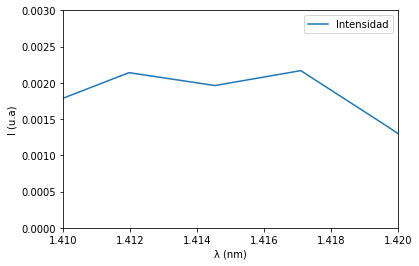

In [14]:
#Beta
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.41,1.42,0,0.003])
plt.legend()
Kbet2=1.414
Kbet2

1.566

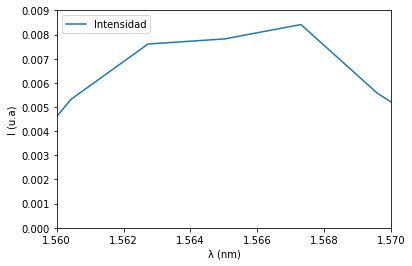

In [15]:
#Alpha
plt.figure(figsize=(6,4))
plt.plot(landa, I, label='Intensidad')
plt.xlabel('\u03bb (nm)')
plt.ylabel('I (u.a)')
plt.axis([1.56,1.57,0,0.009])
plt.legend()
Kalp2=1.566
Kalp2

In [16]:
longAlp=(Kalp+Kalp2)/2
longBet=(Kbet+Kbet2)/2
h=6.62607004E-34
c=299792458
e=1.60217662E-19
print('La longitud de onda de Ka dio', longAlp,'+- 0.007', 'y la de Kb', longBet, '+- 0.007')

La longitud de onda de Ka dio 1.5669624582259996 +- 0.007 y la de Kb 1.414748729209442 +- 0.007


In [17]:
print('Ka=', 1.567,'+-0.007 nm y Kb=', 1.415, '+- 0.07 nm')

Ka= 1.567 +-0.007 nm y Kb= 1.415 +- 0.07 nm


In [18]:
Ealp=h*c/(longAlp*(10**-10))/e
Ebet=h*c/(longBet*(10**-10))/e
DEa=abs(-h*c/(longAlp)**2)*0.07*10**10/e
DEb=abs(-h*c/(longBet)**2)*0.07*10**10/e

In [19]:
Ealp, Ebet, DEa, DEb

(7912.391060005414, 8763.690321715087, 353.4656310958638, 433.61645064905275)

In [20]:
print('Ea=', 7.9,'+-', 0.3, ' y Eb=', 8.8, '+-', 0.4, 'MeV')

Ea= 7.9 +- 0.3  y Eb= 8.8 +- 0.4 MeV


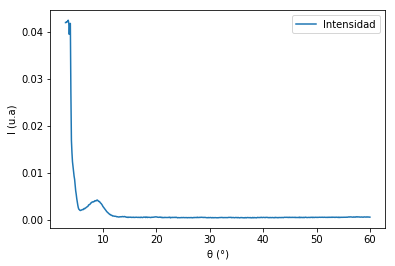

In [21]:
#Análisis para el cristal KBr
theta=np.loadtxt("esp_cara_cobre_KBr.txt", usecols=0)
I=np.loadtxt("esp_cara_cobre_KBr.txt", usecols=1)
plt.figure(figsize=(6,4))
plt.plot(theta, I/sum(I), label='Intensidad')
plt.xlabel('\u03b8 (°)')
plt.ylabel('I (u.a)')
plt.legend()
plt.savefig('inteanguloKBr.png')


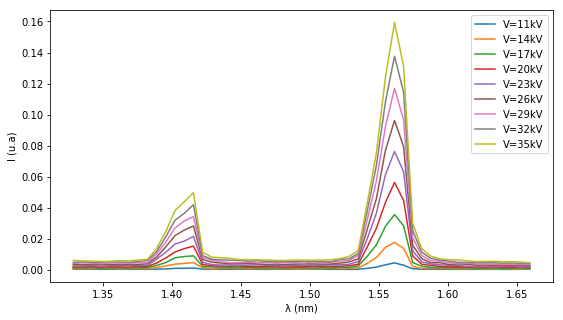

In [22]:
#Analisis en funcion de corriente y voltaje
theta=np.loadtxt('voltaje_variable.txt', usecols=0)
d=2.04E-10
landa=2*d*np.sin(theta*np.pi/180)
landa=landa*(10**10)
Voltajes=np.arange(11,36,3)
plt.figure(figsize=(9,5)) 
Imax=np.loadtxt('voltaje_variable.txt', usecols=9)
for i in range(1,10):
    I=np.loadtxt('voltaje_variable.txt', usecols=i)
    plt.plot(landa, I/sum(Imax), label='V='+str(Voltajes[i-1])+'kV')
    plt.xlabel('\u03bb (nm)')
    plt.ylabel('I (u.a)')
    plt.savefig('EspectroVsVoltaje.png')
    plt.legend()
#Corriente =1mA

EL intercepto dio: -7.7762220511668545 y la pendiente,  1.1839356498185225


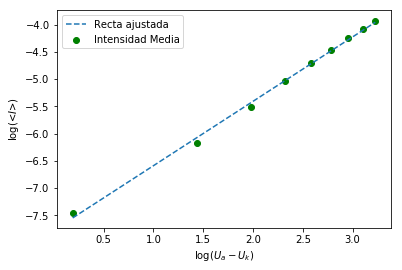

In [23]:
Voltajes=np.arange(11,36,3)
Uk=9.79
IntensidadesMedias=np.zeros(len(Voltajes))
plt.figure(figsize=(6,4))
for i in range(1,10):
    I=np.loadtxt('voltaje_variable.txt', usecols=i)/sum(Imax)
    IntensidadesMedias[i-1]=np.mean(I)
X=np.log(Voltajes-Uk)
Y=np.log(IntensidadesMedias)
fit=np.poly1d(np.polyfit(X,Y, 1))(X)
plt.scatter(X, Y, label='Intensidad Media', c='green')
plt.plot(X,fit, ls='dashed', label='Recta ajustada')
plt.xlabel('log($U_a - U_k$)')
plt.ylabel('log(<$I$>)')
plt.savefig('ImediaVsVoltaje.png')
plt.legend()
print('EL intercepto dio:',np.polyfit(X,Y, 1)[1], 'y la pendiente, ', np.polyfit(X,Y, 1)[0])



EL intercepto dio: -13.926298357714913 y la pendiente,  2.8831234410541104


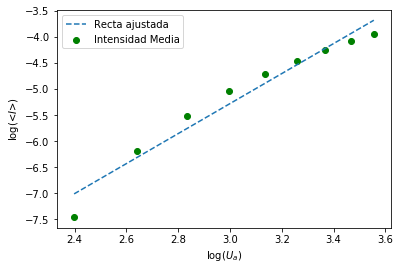

In [24]:
X=np.log(Voltajes)
Y=np.log(IntensidadesMedias)
fit=np.poly1d(np.polyfit(X,Y, 1))(X)
plt.scatter(X, Y, label='Intensidad Media', c='green')
plt.plot(X,fit, ls='dashed', label='Recta ajustada')
plt.xlabel('log($U_a$)')
plt.ylabel('log(<$I$>)')
plt.savefig('ImediaVsVoltajeMala.png')
plt.legend()
print('EL intercepto dio:',np.polyfit(X,Y, 1)[1], 'y la pendiente, ', np.polyfit(X,Y, 1)[0])



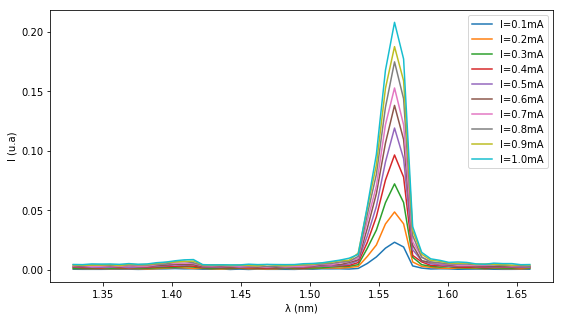

In [46]:
#Voltaje=35kV
theta=np.loadtxt('corriente_variable.txt', usecols=0)
d=2.04E-10
landa=2*d*np.sin(theta*np.pi/180)
landa=landa*(10**10)
Corrientes=np.arange(1,11)/10 #mA
plt.figure(figsize=(9,5)) 
Imax=np.loadtxt('corriente_variable.txt', usecols=10)
for i in range(1,11):
    I=np.loadtxt('corriente_variable.txt', usecols=i)
    plt.plot(landa, I/sum(Imax), label='I='+str(Corrientes[i-1])+'mA')
    plt.xlabel('\u03bb (nm)')
    plt.ylabel('I (u.a)')
    plt.savefig('EspectroVsCorrienteOr.png')
    plt.legend()

EL intercepto dio: 0.0004252402394321568 y la pendiente,  0.01940609202731801


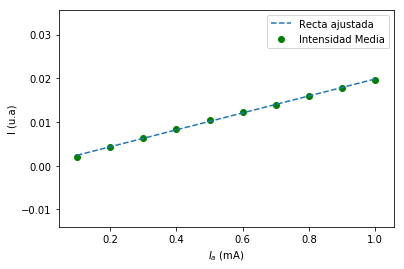

In [28]:
IntensidadesMedias=np.zeros(len(Corrientes))
plt.figure(figsize=(6,4))
for i in range(1,11):
    I=np.loadtxt('corriente_variable.txt', usecols=i)/sum(Imax)
    IntensidadesMedias[i-1]=np.mean(I)
X=Corrientes
Y=IntensidadesMedias
fit=np.poly1d(np.polyfit(X,Y, 1))(X)
plt.scatter(X, Y, label='Intensidad Media', c='green')
plt.plot(X,fit, ls='dashed', label='Recta ajustada')
plt.xlabel('$I_a$ (mA)')
plt.ylabel('I (u.a)')
plt.savefig('ImediaVsCorriente.png')
plt.legend()
print('EL intercepto dio:',np.polyfit(X,Y, 1)[1], 'y la pendiente, ', np.polyfit(X,Y, 1)[0])



In [59]:
#Intensidad de Kb para V=35kV y I=1mA es 0.0085
polinomio=np.poly1d(np.polyfit(X,Y,1)-np.array([0,0.01983-0.08]))
polinomio(1)

0.08000133226675016

In [60]:
len(landa),min(landa),max(landa) #1.39-1.43 nm, l0b=1.41 nm

(51, 1.328318070185199, 1.6594855037492644)

In [61]:
len(landa[landa>1.43]), len(landa[landa<1.39])

(35, 10)

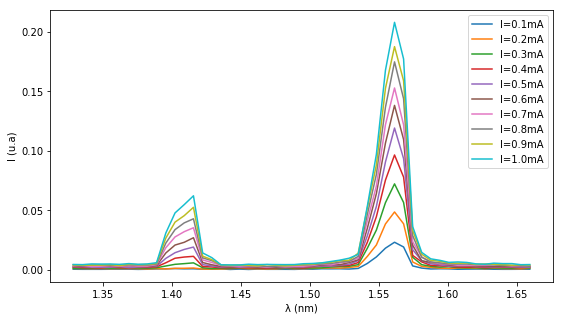

In [89]:
#Voltaje=35kV
theta=np.loadtxt('corriente_variable.txt', usecols=0)
d=2.04E-10
landa=2*d*np.sin(theta*np.pi/180)
landa=landa*(10**10)
Corrientes=np.arange(1,11)/10 #mA
plt.figure(figsize=(9,5)) 
Imax=np.loadtxt('corriente_variable.txt', usecols=10)
for i in range(1,11):
    I=np.loadtxt('corriente_variable.txt', usecols=i)/sum(Imax)
    if(i>1):
        Imaxfake=np.loadtxt('voltaje_variable.txt',usecols=9)
        Ifake=np.loadtxt('voltaje_variable.txt',usecols=(i-1))/sum(Imaxfake)
        I[10:16]=Ifake[10:16]*(5/4)
    plt.plot(landa, I, label='I='+str(Corrientes[i-1])+'mA')
    plt.xlabel('\u03bb (nm)')
    plt.ylabel('I (u.a)')
    plt.savefig('EspectroVsCorrienteUse.png')
    plt.legend()